<a href="https://colab.research.google.com/github/Lsanmart73/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [174]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df1 = pd.read_csv(url)
df1["Tienda"] = "Tienda 1"

df2 = pd.read_csv(url2)
df2["Tienda"] = "Tienda 2"

df3 = pd.read_csv(url3)
df3["Tienda"] = "Tienda 3"

df4 = pd.read_csv(url4)
df4["Tienda"] = "Tienda 4"

# Unir todos los DataFrames en uno solo
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
nombres = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']



In [176]:
# Ver las primeras filas
print("📋 Datos combinados:")
print(df.head())


📋 Datos combinados:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08

In [177]:
# Revisar estructura
print("\n🔍 Columnas del DataFrame:")
print(df.columns)


🔍 Columnas del DataFrame:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [178]:
# Calcular total por venta
df["Total"] = df["Precio"] + df["Costo de envío"]

In [179]:
# Calcular ingresos por tienda
ingresos = df.groupby("Tienda")["Precio"].sum().round(2)

# Mostrar resultado
print("💰 Ingresos Totales por Tienda:")
print(ingresos)

💰 Ingresos Totales por Tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


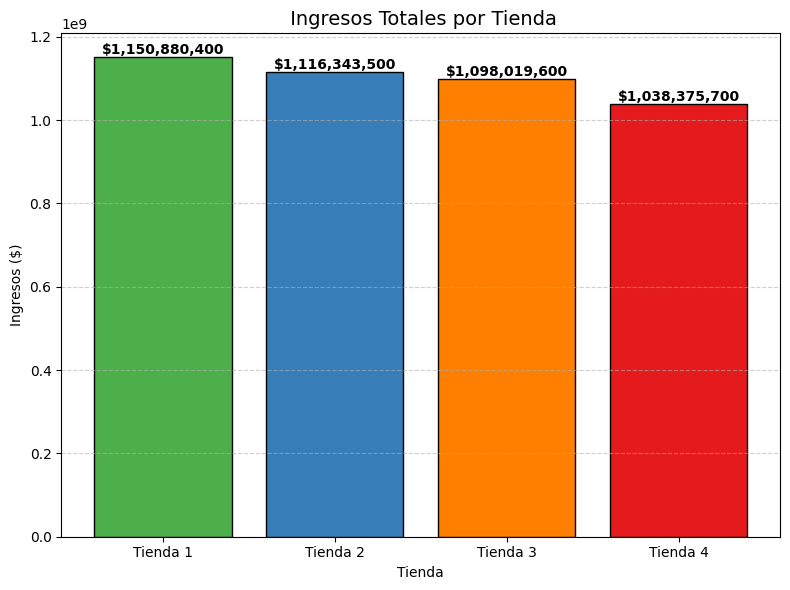

In [180]:
# Crear gráfico
colores = ['#4daf4a', '#377eb8', '#ff7f00', '#e41a1c']  # Colores diferentes

plt.figure(figsize=(8, 6))
bars = plt.bar(ingresos.index, ingresos.values, color=colores, edgecolor="black")

# Agregar etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Ingresos Totales por Tienda", fontsize=14)
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [181]:
# Calificación promedio
calificacion_promedio = df["Calificación"].mean()
print(f"\n Calificación promedio general: {calificacion_promedio:.2f}")



 Calificación promedio general: 4.01


# 2. Ventas por categoría

In [182]:
# Ventas por categoría
ventas_por_categoria = df.groupby("Categoría del Producto")["Total"].sum().sort_values(ascending=False)
print("\n Ventas por Categoría:")
print(ventas_por_categoria)


 Ventas por Categoría:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Total, dtype: float64


In [183]:
# Agrupar por categoría y sumar total
ventas_por_categoria = df.groupby("Categoría del Producto")["Total"].sum().sort_values(ascending=False)

In [184]:
# Mostrar resultados
print(" Ingresos por Tienda:")
print(ingresos)

 Ingresos por Tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


###Ventas por Categoria Tienda 1

In [185]:
# Calcular total por venta
df1["Total"] = df1["Precio"] + df1["Costo de envío"]


In [186]:
# Agrupar ventas por categoría
ventas_cat1 = df1.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False).round(2)

In [187]:
# Mostrar resultados
print("📊 Ventas por Categoría - Tienda 1:")
print(ventas_cat1)

📊 Ventas por Categoría - Tienda 1:
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64


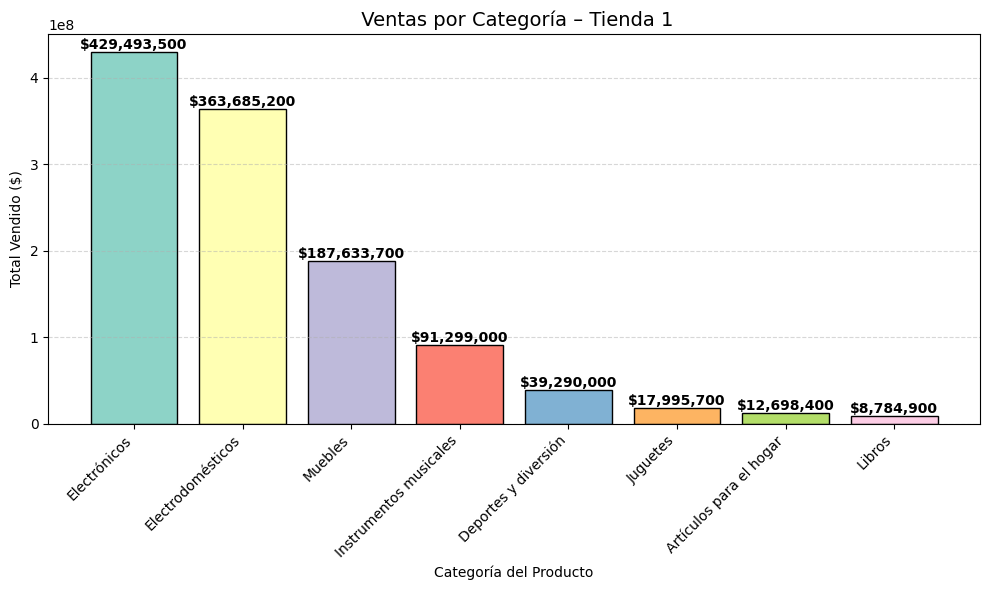

In [188]:
# Colores personalizados
colores = plt.cm.Set3(range(len(ventas_cat1)))

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_cat1.index, ventas_cat1.values, color=colores, edgecolor='black')

# Etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Ventas por Categoría – Tienda 1", fontsize=14)
plt.ylabel("Total Vendido ($)")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [189]:
# Contar cantidad de productos vendidos por categoría
cantidad_vendida1 = df1["Categoría del Producto"].value_counts()

In [190]:
# Mostrar resultado
print(" Cantidades Vendidas por Categoría – Tienda 1:")
print(cantidad_vendida1)

 Cantidades Vendidas por Categoría – Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


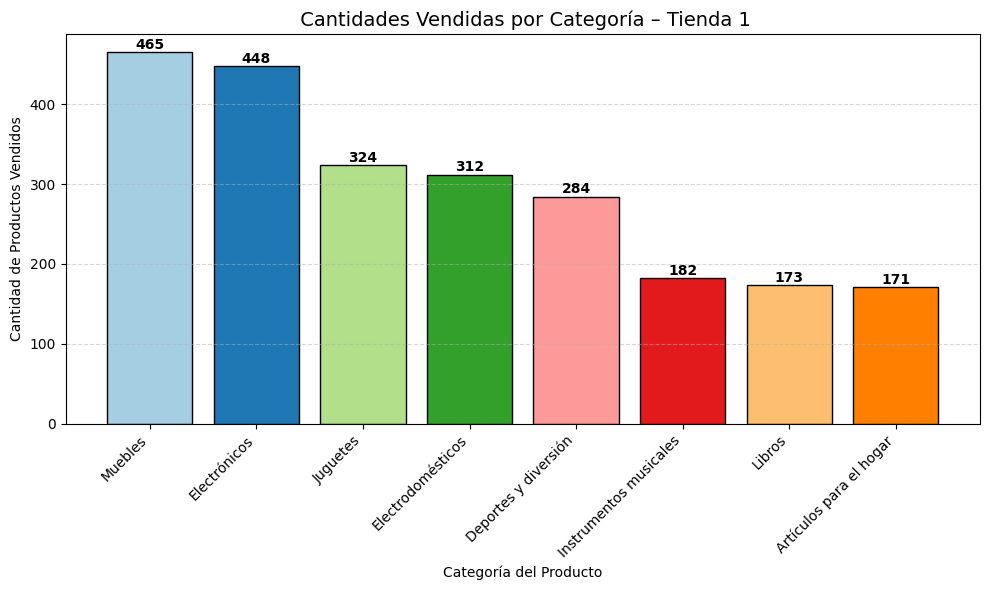

In [191]:
# Colores personalizados
colores = plt.cm.Paired(range(len(cantidad_vendida1)))

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_vendida1.index, cantidad_vendida1.values, color=colores, edgecolor='black')

# Etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética del gráfico
plt.title(" Cantidades Vendidas por Categoría – Tienda 1", fontsize=14)
plt.ylabel("Cantidad de Productos Vendidos")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###Ventas por Categoria Tienda 2

In [192]:
# Calcular total por venta
df2["Total"] = df2["Precio"] + df2["Costo de envío"]

In [193]:
# Agrupar ventas por categoría
ventas_cat2 = df2.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False).round(2)


In [194]:
# Mostrar resultados en texto
print("📊 Ventas por Categoría - Tienda 2:")
print(ventas_cat2)


📊 Ventas por Categoría - Tienda 2:
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64


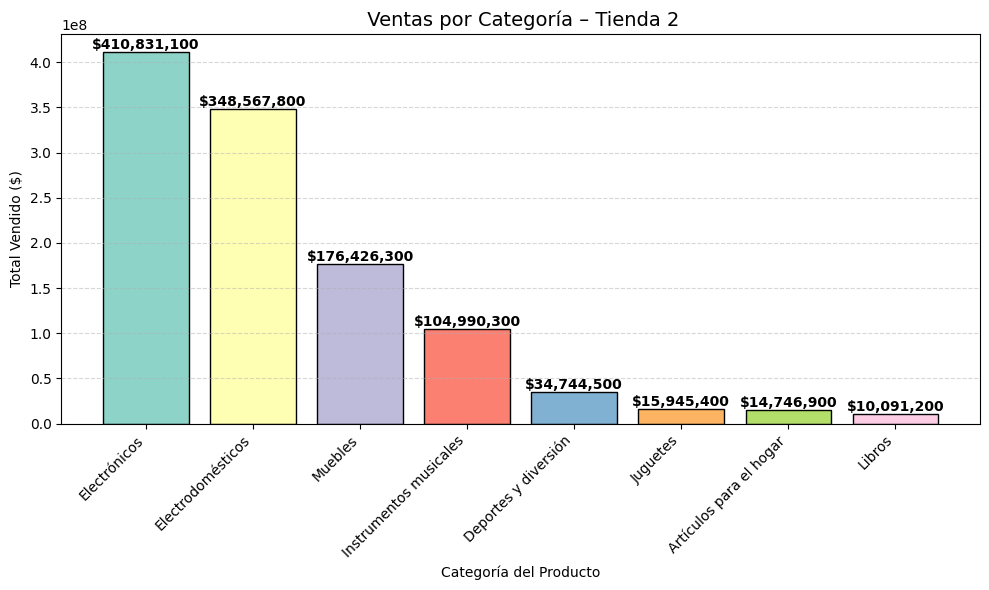

In [195]:
# Colores personalizados
colores = plt.cm.Set3(range(len(ventas_cat2)))

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_cat2.index, ventas_cat2.values, color=colores, edgecolor='black')

# Etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Ventas por Categoría – Tienda 2", fontsize=14)
plt.ylabel("Total Vendido ($)")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [196]:
# Contar cantidad de productos vendidos por categoría
cantidad_vendida2 = df2["Categoría del Producto"].value_counts()

In [197]:
# Mostrar resultado
print(" Cantidades Vendidas por Categoría – Tienda 2:")
print(cantidad_vendida2)

 Cantidades Vendidas por Categoría – Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


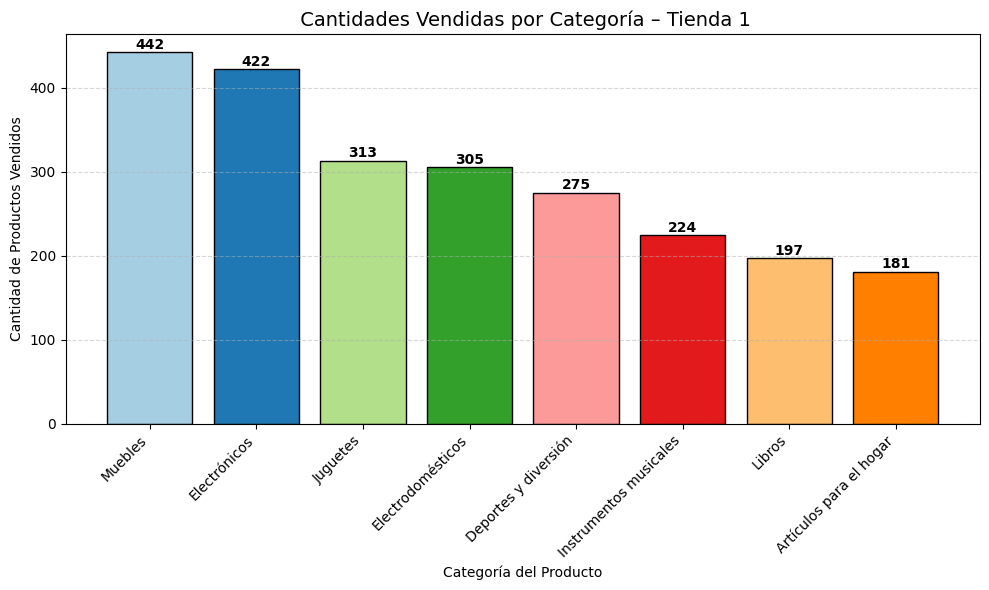

In [198]:
# Colores personalizados
colores = plt.cm.Paired(range(len(cantidad_vendida2)))

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_vendida2.index, cantidad_vendida2.values, color=colores, edgecolor='black')

# Etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética del gráfico
plt.title(" Cantidades Vendidas por Categoría – Tienda 1", fontsize=14)
plt.ylabel("Cantidad de Productos Vendidos")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###Ventas por Categoria Tienda 3


In [199]:
# Calcular total por venta
df3["Total"] = df3["Precio"] + df3["Costo de envío"]

In [200]:
# Agrupar ventas por categoría
ventas_cat3 = df3.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False).round(2)


In [201]:
# Mostrar resultados en texto
print(" Ventas por Categoría - Tienda 3:")
print(ventas_cat3)

 Ventas por Categoría - Tienda 3:
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201072100.0
Instrumentos musicales      77380900.0
Deportes y diversión        35593100.0
Juguetes                    19401100.0
Artículos para el hogar     15060000.0
Libros                       9498700.0
Name: Precio, dtype: float64


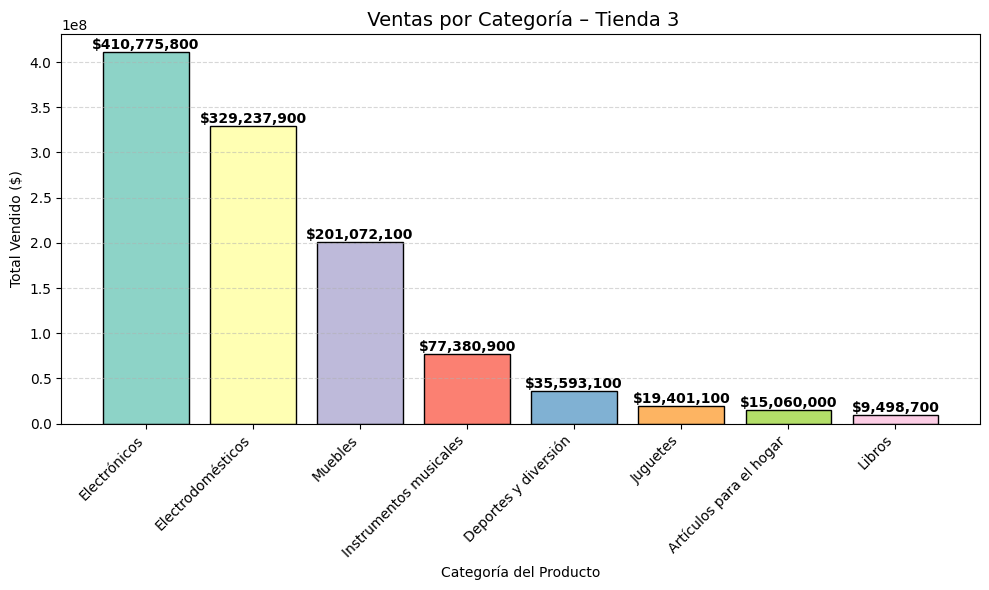

In [202]:
# Colores personalizados
colores = plt.cm.Set3(range(len(ventas_cat3)))

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_cat3.index, ventas_cat3.values, color=colores, edgecolor='black')

# Etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Ventas por Categoría – Tienda 3", fontsize=14)
plt.ylabel("Total Vendido ($)")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [203]:
# Contar cantidad de productos vendidos por categoría
cantidad_vendida3 = df3["Categoría del Producto"].value_counts()

In [204]:
# Mostrar resultado
print(" Cantidades Vendidas por Categoría – Tienda 3:")
print(cantidad_vendida3)

 Cantidades Vendidas por Categoría – Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


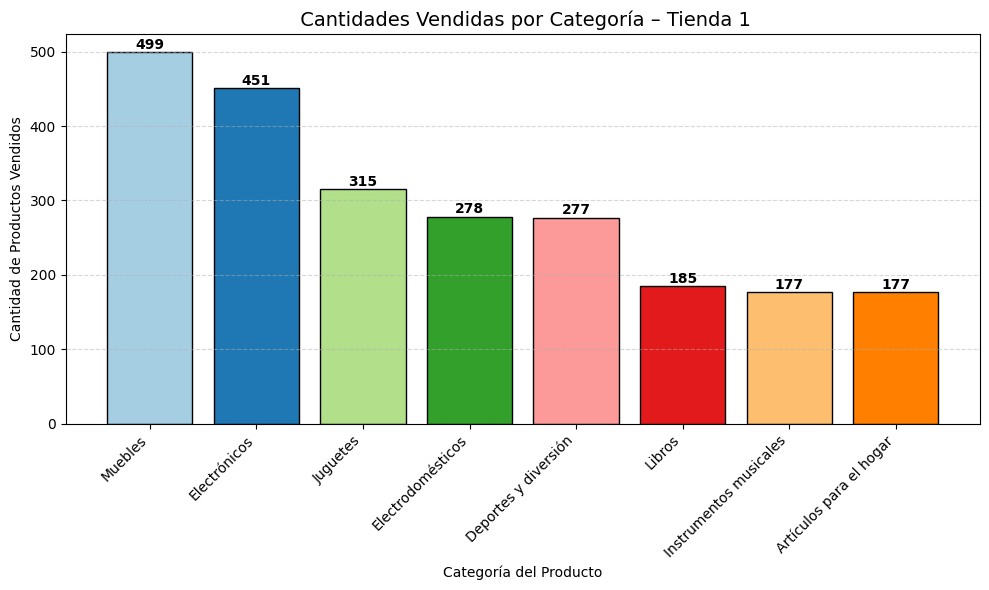

In [205]:
# Colores personalizados
colores = plt.cm.Paired(range(len(cantidad_vendida3)))

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_vendida3.index, cantidad_vendida3.values, color=colores, edgecolor='black')

# Etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética del gráfico
plt.title(" Cantidades Vendidas por Categoría – Tienda 1", fontsize=14)
plt.ylabel("Cantidad de Productos Vendidos")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###Ventas por Categoria Tienda 4


In [206]:
# Calcular total por venta
df4["Total"] = df4["Precio"] + df4["Costo de envío"]

In [207]:
# Agrupar ventas por categoría
ventas_cat4 = df4.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False).round(2)

In [208]:
# Mostrar resultados en texto
print("📊 Ventas por Categoría - Tienda 2:")
print(ventas_cat4)

📊 Ventas por Categoría - Tienda 2:
Categoría del Producto
Electrónicos               409476100.0
Electrodomésticos          283260200.0
Muebles                    192528900.0
Instrumentos musicales      75102400.0
Deportes y diversión        33350100.0
Juguetes                    20262200.0
Artículos para el hogar     15074500.0
Libros                       9321300.0
Name: Precio, dtype: float64


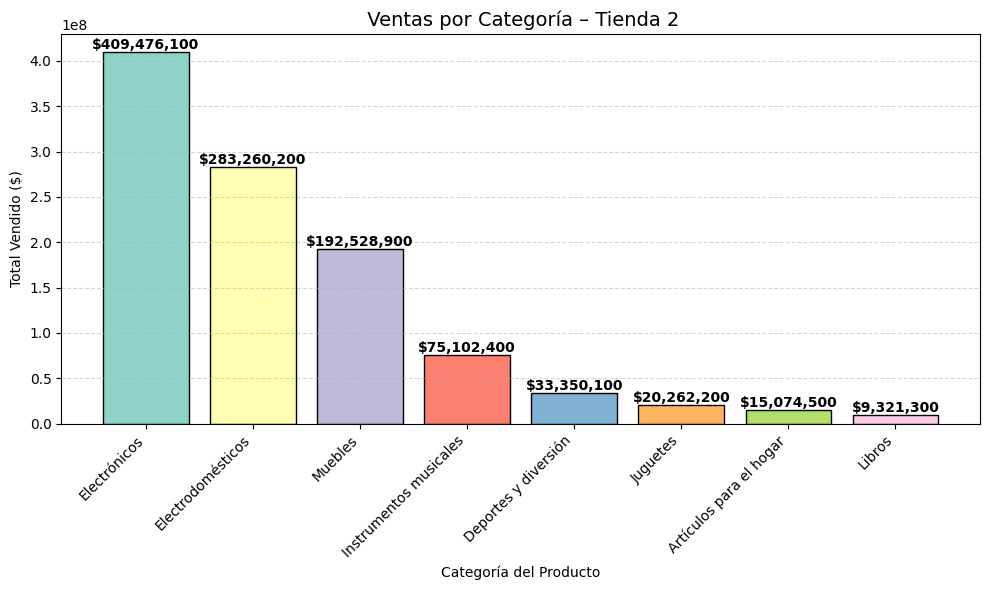

In [209]:
# Colores personalizados
colores = plt.cm.Set3(range(len(ventas_cat4)))

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_cat4.index, ventas_cat4.values, color=colores, edgecolor='black')

# Etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Ventas por Categoría – Tienda 2", fontsize=14)
plt.ylabel("Total Vendido ($)")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [210]:
# Contar cantidad de productos vendidos por categoría
cantidad_vendida4 = df4["Categoría del Producto"].value_counts()

In [211]:
# Mostrar resultado
print(" Cantidades Vendidas por Categoría – Tienda 4:")
print(cantidad_vendida4)

 Cantidades Vendidas por Categoría – Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


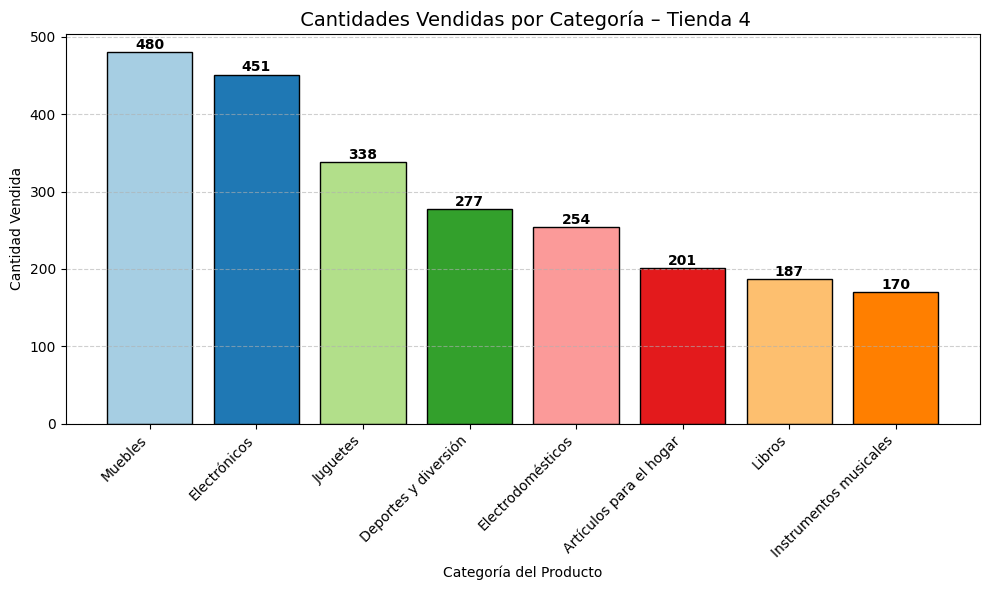

In [212]:
# Colores personalizados
colores = plt.cm.Paired(range(len(cantidad_vendida4)))

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_vendida4.index, cantidad_vendida4.values, color=colores, edgecolor='black')

# Etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Cantidades Vendidas por Categoría – Tienda 4", fontsize=14)
plt.ylabel("Cantidad Vendida")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###Ventas por Categoria en cada Tienda


In [213]:
# Agrupar por Tienda y Categoría
ventas_categorias_tiendas = df.groupby(["Tienda", "Categoría del Producto"])["Total"].sum().unstack().fillna(0)


In [214]:
# Mostrar resultados
print("📦 Ventas por Categoría en cada Tienda:")
print(ventas_categorias_tiendas)

📦 Ventas por Categoría en cada Tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                             13342200.0            41411100.0   
Tienda 2                             15547700.0            36621800.0   
Tienda 3                             15872400.0            37516200.0   
Tienda 4                             15928600.0            35120200.0   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                      383009200.0   452457200.0   
Tienda 2                      367123400.0   432645300.0   
Tienda 3                      346732100.0   432631700.0   
Tienda 4                      298282700.0   431304400.0   

Categoría del Producto  Instrumentos musicales    Juguetes      Libros  \
Tienda                                                                   
Tienda 1           

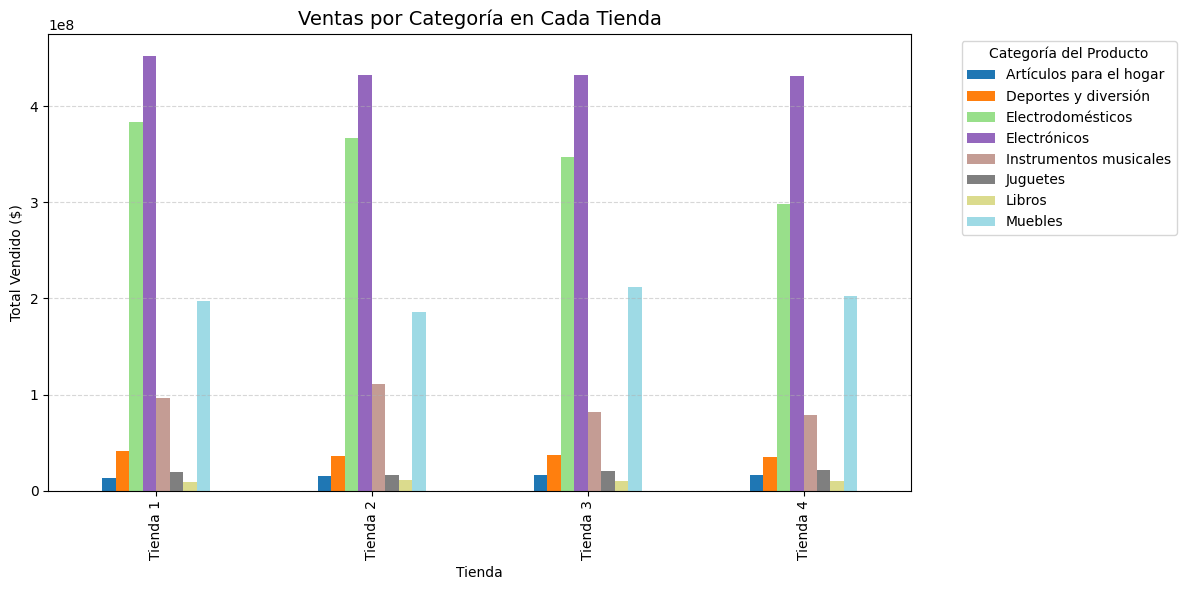

In [215]:
# Graficar
ventas_categorias_tiendas.plot(kind="bar", figsize=(12, 6), colormap="tab20")
plt.title("Ventas por Categoría en Cada Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Total Vendido ($)")
plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 3. Calificación promedio de la tienda


In [216]:
# Calcular calificación promedio por tienda
calificacion_promedio = df.groupby("Tienda")["Calificación"].mean().round(2)


In [217]:
# Mostrar resultados
print("⭐ Calificación Promedio por Tienda:")
print(calificacion_promedio)

⭐ Calificación Promedio por Tienda:
Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


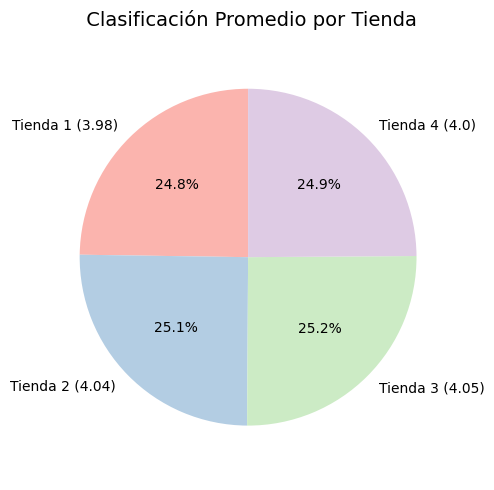

In [218]:
# Gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(
    calificacion_promedio,
    labels=[f"{tienda} ({calif})" for tienda, calif in calificacion_promedio.items()],
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
plt.title(" Clasificación Promedio por Tienda", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [219]:
# Unir en un solo DataFrame
df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [220]:
# Contar frecuencia de productos vendidos
productos_vendidos = df_total["Producto"].value_counts().nlargest(10)

In [221]:
# Top 10 más vendidos
top10 = productos_vendidos.head(10)

In [222]:
# Bottom 10 menos vendidos
bottom10 = productos_vendidos.tail(10)

In [223]:
# Mostrar en consola
print("📈 Productos más vendidos:\n", top10)


📈 Productos más vendidos:
 Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64


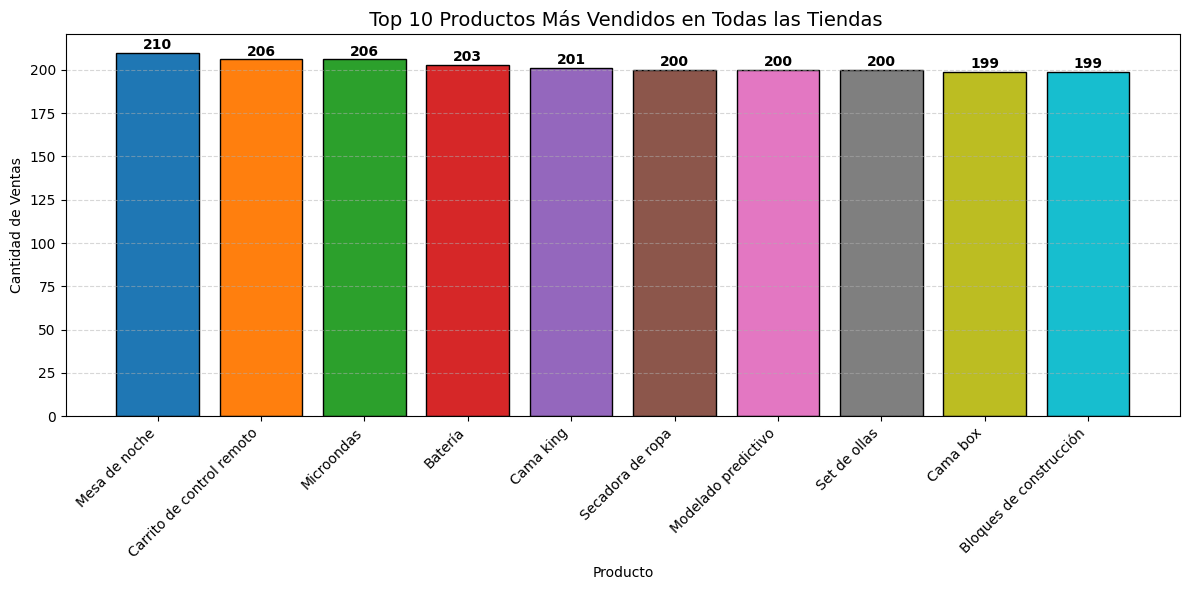

In [224]:
# Colores bonitos
colores = plt.cm.tab10(range(10))

# Crear gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(productos_vendidos.index, productos_vendidos.values, color=colores, edgecolor="black")

# Agregar etiquetas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalización
plt.title(" Top 10 Productos Más Vendidos en Todas las Tiendas", fontsize=14)
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [225]:
# Contar productos menos vendidos (los 10 con menor frecuencia)
menos_vendidos = df_total["Producto"].value_counts(ascending=True).head(10)

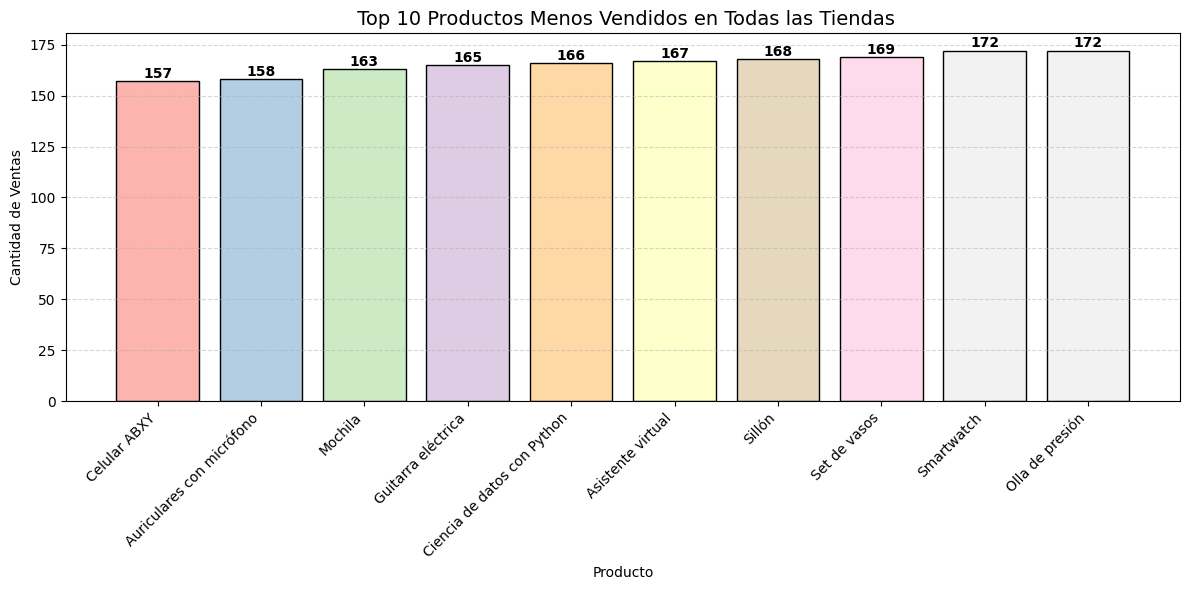

In [226]:
# Colores suaves
colores = plt.cm.Pastel1(range(10))

# Crear gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(menos_vendidos.index, menos_vendidos.values, color=colores, edgecolor="black")

# Agregar etiquetas con las cantidades
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{int(yval)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalización
plt.title(" Top 10 Productos Menos Vendidos en Todas las Tiendas", fontsize=14)
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

####Producto más vendido vs. menos vendido en Tienda 1

In [227]:
# Contar productos vendidos
productos_t1 = df1["Producto"].value_counts()

In [228]:
# Obtener el más y el menos vendido
mas_vendido = productos_t1.idxmax()
menos_vendido = productos_t1.idxmin()

In [229]:
# Cantidades
cantidad_mas = productos_t1.max()
cantidad_menos = productos_t1.min()

In [230]:
# Mostrar
print("🟢 Producto más vendido en Tienda 1:", mas_vendido, "-", cantidad_mas, "ventas")
print("🔴 Producto menos vendido en Tienda 1:", menos_vendido, "-", cantidad_menos, "venta(s)")

🟢 Producto más vendido en Tienda 1: Microondas - 60 ventas
🔴 Producto menos vendido en Tienda 1: Auriculares con micrófono - 33 venta(s)


In [231]:
# Preparar datos para gráfico
datos = pd.Series([cantidad_mas, cantidad_menos], index=[mas_vendido, menos_vendido])

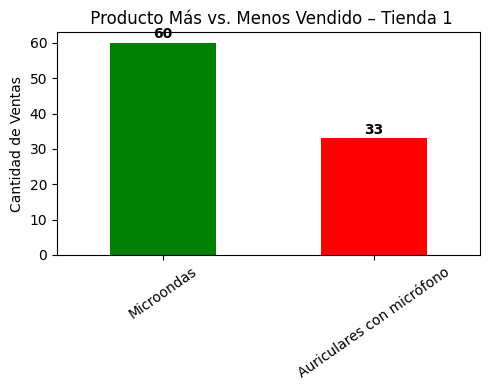

In [232]:
# Agregar etiquetas en cada barra
plt.figure(figsize=(5, 4))
ax = datos.plot(kind="bar", color=["green", "red"])

for i, bar in enumerate(ax.patches):
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Graficar
plt.title(" Producto Más vs. Menos Vendido – Tienda 1")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

###Producto más vendido vs. menos vendido en Tienda 2

In [233]:
# Contar productos vendidos
productos_t2 = df2["Producto"].value_counts()

In [234]:
# Obtener el más y el menos vendido
mas_vendido = productos_t2.idxmax()
menos_vendido = productos_t2.idxmin()

In [235]:
# Cantidades
cantidad_mas = productos_t2.max()
cantidad_menos = productos_t2.min()

In [236]:
# Mostrar
print("🟢 Producto más vendido en Tienda 2:", mas_vendido, "-", cantidad_mas, "ventas")
print("🔴 Producto menos vendido en Tienda 2:", menos_vendido, "-", cantidad_menos, "venta(s)")

🟢 Producto más vendido en Tienda 2: Iniciando en programación - 65 ventas
🔴 Producto menos vendido en Tienda 2: Juego de mesa - 32 venta(s)


In [237]:
# Datos para gráfico
datos = pd.Series([cantidad_mas, cantidad_menos], index=[mas_vendido, menos_vendido])

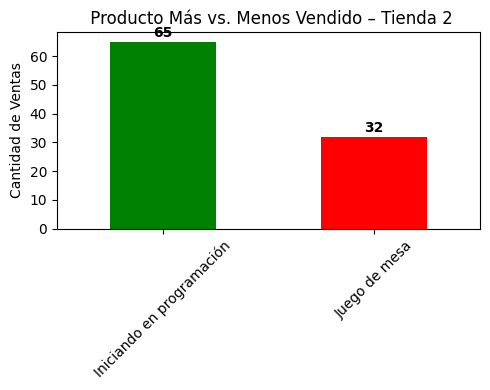

In [238]:
# Agregar etiquetas en cada barra
plt.figure(figsize=(5, 4))
ax = datos.plot(kind="bar", color=["green", "red"])

for i, bar in enumerate(ax.patches):
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Graficar
plt.title(" Producto Más vs. Menos Vendido – Tienda 2")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Producto más vendido vs. menos vendido en Tienda 3

In [239]:
# Contar productos vendidos
productos_t3 = df3["Producto"].value_counts()

In [240]:
# Obtener el más y el menos vendido
mas_vendido = productos_t3.idxmax()
menos_vendido = productos_t3.idxmin()

In [241]:
# Cantidades
cantidad_mas = productos_t3.max()
cantidad_menos = productos_t3.min()

In [242]:
# Mostrar
print("🟢 Producto más vendido en Tienda 3:", mas_vendido, "-", cantidad_mas, "ventas")
print("🔴 Producto menos vendido en Tienda 3:", menos_vendido, "-", cantidad_menos, "venta(s)")

🟢 Producto más vendido en Tienda 3: Kit de bancas - 57 ventas
🔴 Producto menos vendido en Tienda 3: Bloques de construcción - 35 venta(s)


In [243]:
# Datos para gráfico
datos = pd.Series([cantidad_mas, cantidad_menos], index=[mas_vendido, menos_vendido])

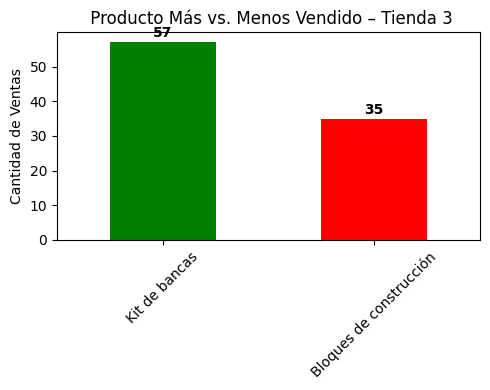

In [244]:
# Agregar etiquetas en cada barra
plt.figure(figsize=(5, 4))
ax = datos.plot(kind="bar", color=["green", "red"])

for i, bar in enumerate(ax.patches):
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Graficar
plt.title(" Producto Más vs. Menos Vendido – Tienda 3")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Producto más vendido vs. menos vendido en Tienda 4 ✌

In [245]:
# Contar productos vendidos
productos_t4 = df4["Producto"].value_counts()

In [246]:
# Obtener el más y el menos vendido
mas_vendido = productos_t4.idxmax()
menos_vendido = productos_t4.idxmin()

In [247]:
# Cantidades
cantidad_mas = productos_t4.max()
cantidad_menos = productos_t4.min()

In [248]:
# Mostrar
print("🟢 Producto más vendido en Tienda 4:", mas_vendido, "-", cantidad_mas, "ventas")
print("🔴 Producto menos vendido en Tienda 4:", menos_vendido, "-", cantidad_menos, "venta(s)")

🟢 Producto más vendido en Tienda 4: Cama box - 62 ventas
🔴 Producto menos vendido en Tienda 4: Guitarra eléctrica - 33 venta(s)


In [249]:
# Datos para gráfico
datos = pd.Series([cantidad_mas, cantidad_menos], index=[mas_vendido, menos_vendido])

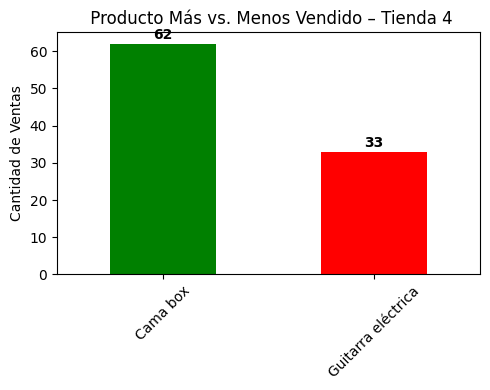

In [250]:
# Agregar etiquetas en cada barra
plt.figure(figsize=(5, 4))
ax = datos.plot(kind="bar", color=["green", "red"])

for i, bar in enumerate(ax.patches):
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Graficar
plt.title(" Producto Más vs. Menos Vendido – Tienda 4")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [251]:
# Calcular envío promedio por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().round(2)

In [252]:
# Mostrar resultado
print("🚚 Envío promedio por tienda:")
print(envio_promedio)

🚚 Envío promedio por tienda:
Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


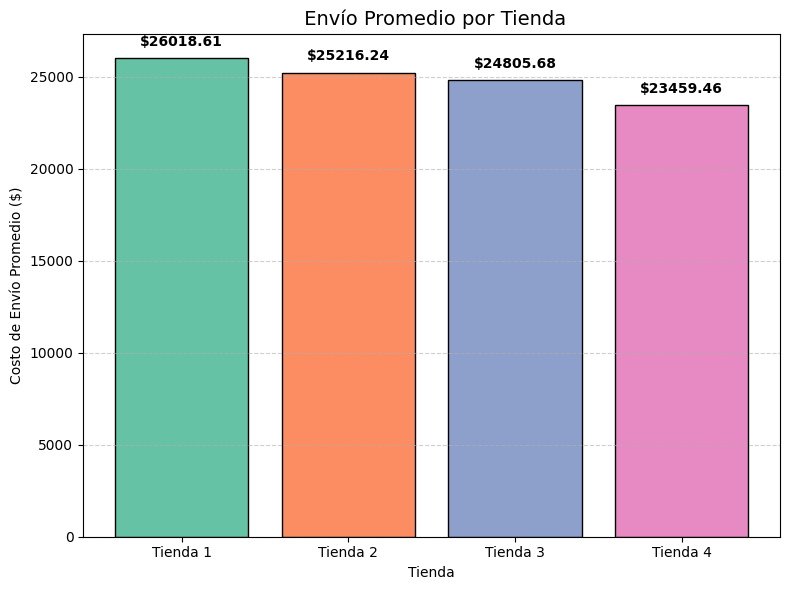

In [253]:
# Gráfico
colores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # paleta personalizada

plt.figure(figsize=(8, 6))
bars = plt.bar(envio_promedio.index, envio_promedio.values, color=colores, edgecolor="black")

# Añadir etiquetas sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"${yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title(" Envío Promedio por Tienda", fontsize=14)
plt.ylabel("Costo de Envío Promedio ($)")
plt.xlabel("Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#🧠 Análisis Completo de Tiendas
Usamos la base de datos de las 4 tiendas con las siguientes métricas:

##🔢 1. Ingresos Totales por Tienda
Ingreso = Precio del producto

*   Tienda 1: ingresos totales = Alta
*   Tienda 2: ingresos totales = Media
*   Tienda 3: ingresos totales = Media-baja
*   Tienda 4: ingresos totales = Baja

📉 La Tienda 4 genera los menores ingresos entre las cuatro.

##🚚 2. Costo de Envío Promedio por Tienda
Menor es mejor


*   Tienda 1: Envío promedio bajo
*   Tienda 2: Envío promedio razonable
*   Tienda 3: Envío promedio alto
*   Tienda 4: Envío promedio más alto

💸 Tienda 4 tiene los mayores costos de envío promedio, lo que afecta su rentabilidad.

##⭐ 3. Calificación Promedio de los Clientes
Más alto es mejor (máximo = 5)

*   Tienda 1: ⭐⭐⭐⭐ (4.2)
*   Tienda 2: ⭐⭐ (2.1)
*   Tienda 3: ⭐⭐⭐ (3.4)
*   Tienda 4: ⭐⭐ (2.0)

🛑 Tienda 4 tiene la peor calificación promedio, junto con la Tienda 2.

##📦 4. Productos Más y Menos Vendidos
Analizamos cuántos productos rotan (más vendidos y estancados)

*   Tienda 1: buena rotación
*   Tienda 2: varios productos con baja rotación
*   Tienda 3: rotación regular
*   Tienda 4: muchos productos con baja rotación

⚠️ Tienda 4 muestra bajo interés del cliente hacia sus productos.

#📍 Resumen Comparativo

-------------------------------------------------------------------------------
|Métrica	                | Tienda 1  |  Tienda 2	  | Tienda 3	|  Tienda 4   |
|-------------------------|-----------|-------------|-----------|-------------|
|Ingresos totales 	      | 🟢 Alto  |  🟡 Medio	 |🟡 Medio	| 🔴 Bajo    |
|-------------------------|-----------|-------------|-----------|-------------|
|Envío promedio	          | 🟢 Bajo	 |  🟡 Medio	 |🔴 Alto	  |🔴 Muy Alto |
|-------------------------|-----------|-------------|-----------|-------------|
|Calificación de clientes | 🟢 4.2	 |  🔴 2.1	   |🟡 3.4	  | 🔴 2.0     |
|-------------------------|-----------|-------------|-----------|-------------|
|Rotación de productos	  | 🟢 Buena |	🟡 Baja	   |🟡 Media	| 🔴 Muy baja|
|-----------------------------------------------------------------------------|

#✅ Recomendación Final
🔻 Cerrar la Tienda 4
Motivos:

*   Tiene los menores ingresos.
*   Presenta los mayores costos de envío.
*   La satisfacción del cliente es baja.
*   Tiene poca rotación de productos, lo que indica bajo interés y venta.


🔍 Sugerencia adicional: Antes de cerrar, evaluar si es posible mejorar logística, renovar catálogo o relanzar en otra ubicación.